# Wine Quality Machine Learning Model

In [5]:
import warnings
warnings.simplefilter('ignore')
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Dataset:  winequality-white.csv

Source: https://archive.ics.uci.edu/ml/datasets/wine+quality
  Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

Description: Dataset used is related to white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.
Number of Samples : 4898
Number of Attributes : 12

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)



In [9]:
# Read the csv file into a pandas DataFrame

white_wine_df = pd.read_csv('Resources/winequality-white.csv')
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Extract Transform, Clean the data new data frame

In [24]:
# Drop the null columns where all values are null
white_wine_df = white_wine_df.dropna(axis='columns', how='all')
# Drop the null rows
white_wine_df = white_wine_df.dropna()
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
# Rename columns to remove spaces

white_wine_df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity',  'citric acid': 'citric_acid'
,'residual sugar': 'residual_sugar'
,'free sulfur dioxide': 'free_sulfur_dioxide'
,'total sulfur dioxide': 'total_sulfur_dioxide' 
}, inplace=True)


In [93]:
white_wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
white_wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


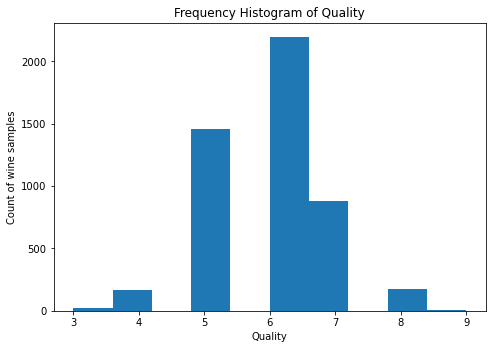

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = white_wine_df.quality
y = white_wine_df.quality.sum()
ax.set_title('Frequency Histogram of Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count of wine samples')
plt.hist(x)
plt.show()

In [66]:
white_wine_df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

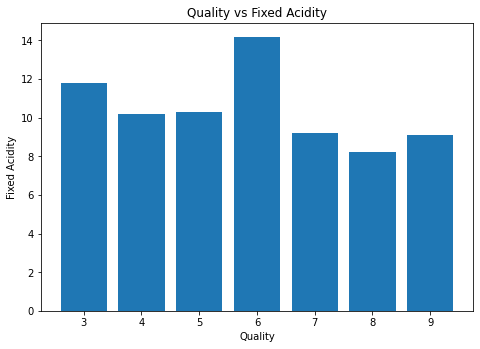

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = white_wine_df.quality
y = white_wine_df.fixed_acidity
ax.set_title('Quality vs Fixed Acidity')
ax.set_xlabel('Quality')
ax.set_ylabel('Fixed Acidity')
plt.bar(x,y)
plt.show()

In [48]:
# y1 = white_wine_df.volatile_acidity
# y2 = white_wine_df.total_sulfur_dioxide
# y3 = white_wine_df.alcohol
# # X  = white_wine_df.quality
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(X + 0.00, y1, color = 'b', width = 0.25)
# ax.bar(X + 0.25, y2, color = 'g', width = 0.25)
# ax.bar(X + 0.50, y3, color = 'r', width = 0.25)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

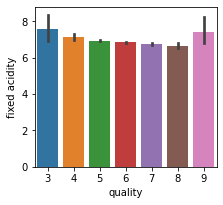

In [ ]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=white_wine)


In [79]:

X = white_wine_df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',       'pH', 'sulphates', 'alcohol']]
y = white_wine_df["quality"].values.reshape(-1, 1)
print(X.shape, y.shape)


(4898, 11) (4898, 1)


## Scaling and Normalization

In [89]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2835,6.3,0.25,0.22,3.30,0.048,41.0,161.0,0.99256,3.16,0.50,10.5
1157,7.8,0.30,0.29,16.85,0.054,23.0,135.0,0.99980,3.16,0.38,9.0
744,7.4,0.38,0.27,7.50,0.041,24.0,160.0,0.99535,3.17,0.43,10.0
1448,7.4,0.16,0.49,1.20,0.055,18.0,150.0,0.99170,3.23,0.47,11.2
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [90]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [91]:
 X_train_scaled = X_scaler.transform(X_train)
 X_test_scaled = X_scaler.transform(X_test)
 y_train_scaled = y_scaler.transform(y_train)
 y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

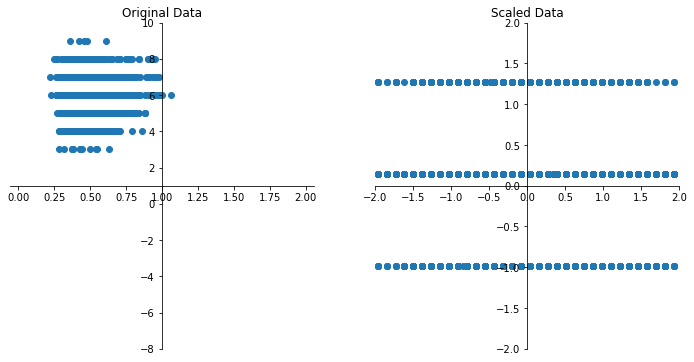

In [95]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["sulphates"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["sulphates"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

## Putting it all together

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [ ]:
# X = pd.get_dummies(white_wine[["size", "gender", "age"]])
# y = brain["weight"].values.reshape(-1, 1)
# X.head()

Step 2) Split data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [ ]:
joblib.dump(X_scaler,'xscaler.sav')

['xscaler.sav']

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

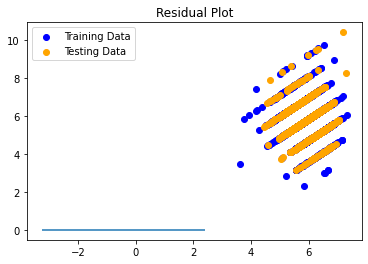

In [ ]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5645877915189051, R2: 0.2727562934675569


In [ ]:
#Save the model
import joblib
filename = 'finalproject_wine.sav'
joblib.dump(model, filename)

['finalproject_wine.sav']

In [ ]:
new_wine_predict=joblib.load( filename)
xxscaler=joblib.load('xscaler.sav')


Your Turn!

In [ ]:
new_wine_df = pd.read_csv('Resources/new_wine.csv')
new_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9


In [ ]:
# file = open("/path/to/model", "rb")
# model = joblib.load(file)
# inputs = #some array of data to be predicted
yy=xxscaler.transform([[7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9]])
new_wine_predict.predict(yy)
# new_wine_predict.predict([7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9])


array([[5.78397297]])

In [ ]:
#new_wine_df.loc[0]

fixed acidity             7.000
volatile acidity          0.270
citric acid               0.360
residual sugar           20.700
chlorides                 0.045
free sulfur dioxide      45.000
total sulfur dioxide    170.000
density                   1.001
pH                        3.000
sulphates                 0.450
alcohol                   8.800
Name: 0, dtype: float64

In [ ]:
#new_wine_predict.predict(xxscaler.transform(new_wine_df.loc[0].to_numpy().reshape(1,-1)))

array([[5.554441]])